In [36]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [11]:
X_train = np.load(os.path.join(data_folder, 'Xy_train_strat_dist.npz'))["y"]
y_train = np.load(os.path.join(data_folder, 'Xy_train_strat_dist.npz'))["dist"]

In [39]:
X_test = np.load(os.path.join(data_folder, 'Xy_test_strat_dist.npz'))["y"]
y_test = np.load(os.path.join(data_folder, 'Xy_test_strat_dist.npz'))["dist"]

In [26]:
y_train

array([ 4, 25,  4,  2, 25,  2, 10, 10,  2, 25,  2,  4,  2, 25, 25,  2, 25,
        2, 25,  2,  4,  2, 10,  4,  2,  2, 25,  2,  4,  4, 10,  2, 10, 25,
        2,  2, 25, 10, 10,  2,  4,  2,  4,  4,  2,  4, 10,  2,  4, 10, 10,
       25,  2,  4, 25, 25, 25, 25,  4,  4, 25,  4, 10,  4,  4, 10, 25,  4,
        4, 10,  2,  4, 10, 25,  2, 25,  2,  4,  4, 10, 25,  2,  4,  4, 10,
        4, 25, 25,  4,  2, 10, 10, 10, 10,  2, 25,  4, 25,  4, 25, 10, 10,
       10, 10, 10, 25, 25, 25,  4,  4,  2,  2, 10,  2, 25,  2,  2,  2, 10,
        2,  4,  4,  2, 25, 25, 25, 25,  4,  2, 25,  4, 10, 10,  4, 25,  2,
       10,  2, 25,  2,  2, 10, 25,  2,  4, 10,  2, 25,  2, 10, 10,  4, 25,
        4, 10, 25, 25,  2,  2, 10,  2, 25, 25, 10, 10,  2,  2,  4,  4,  2,
       10,  2,  4,  2,  4, 25, 25, 25, 25, 25, 25,  2,  2, 10,  2, 10,  2,
        2, 25,  2, 10,  2,  2, 10,  2,  4, 10, 25,  4, 25,  2, 25, 10, 10,
        2,  4, 25, 10, 25,  2,  2,  4,  2,  4, 10,  4,  4, 10,  4, 25, 10,
       10, 10,  4, 25,  2

In [12]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [20]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

In [27]:
X_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["y"]
y_15mm = np.load(os.path.join(data_folder, "Xy_15mm.npz"))["dist"]

X_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["y"]
y_20mm = np.load(os.path.join(data_folder, "Xy_20mm.npz"))["dist"]



In [40]:
X_train_cut = cut_X(X_train)
X_train_RF = reshape_RF(X_train_cut)

X_test_cut = cut_X(X_test)
X_test_RF = reshape_RF(X_test_cut)



In [28]:

X_1mm_cut = cut_X(X_1mm)
X_1mm_RF = reshape_RF(X_1mm_cut)

X_3mm_cut = cut_X(X_3mm)
X_3mm_RF = reshape_RF(X_3mm_cut)

X_15mm_cut = cut_X(X_15mm)
X_15mm_RF = reshape_RF(X_15mm_cut)

X_20mm_cut = cut_X(X_20mm)
X_20mm_RF = reshape_RF(X_20mm_cut)


In [15]:
rf = joblib.load(os.path.join(data_dir,"trained_models","Leaf_position_regression","leaf_regression_RF_30est_8depth.pkl"))

In [18]:
preds_15mm = rf.predict(X_15mm_RF)

In [19]:
mean_squared_error(y_15mm, preds_15mm)

0.14568148148148144

In [22]:
preds_1mm = rf.predict(X_1mm_RF)

In [24]:
mean_squared_error(y_1mm, preds_1mm)

1.0

In [23]:
preds_3mm = rf.predict(X_3mm_RF)

In [25]:
mean_squared_error(y_3mm, preds_3mm)

0.49333333333333335

In [29]:
preds_20mm = rf.predict(X_20mm_RF)

In [30]:
mean_squared_error(y_20mm, preds_20mm)

1.1747333333333332

In [31]:
preds_20mm

array([18.5, 18.5, 19. , 21. , 20.5, 20. , 19. , 19.5, 18. , 18.5, 20. ,
       21. , 20. , 21. , 19. , 19. , 20.5, 20. , 19. , 18.3, 20.5, 21.5,
       21.5, 19. , 18. , 18. , 19.5, 20.5, 21. , 18.5, 19. , 19.5, 21.5,
       19. , 20. , 19.5, 22. , 21. , 19.8, 18.5, 21. , 19. , 19.5, 20. ,
       19. , 18.5, 21.5, 20.5, 19.1, 18.5, 22. , 19. , 20. , 19.5, 18.5,
       19.5, 20. , 19.5, 19. , 18.5, 19.5, 20.5, 20.5, 19. , 18.5, 20. ,
       21. , 19. , 21. , 18.5, 19.5, 21. , 21.5, 18.5, 19. , 21.5, 19.5,
       20. , 21. , 18.5, 19.5, 21. , 19. , 18.5, 19. , 20.5, 19. , 18.5,
       21. , 19. , 18.5, 20.6, 20.5, 19.3, 19. , 20. , 19.5, 19. , 19.5,
       19. , 19.5, 20. , 20.6, 18. , 19. , 19.5, 20. , 19. , 18.5, 19.5,
       20. , 19.5, 19.5, 21. , 20. , 18. , 21.5, 20. , 18.5, 17.5, 19.5,
       20. , 20.5, 20. , 20. , 19. , 19. , 21. , 20. , 19. , 21.5, 20. ,
       19.5, 21.5, 18.5, 18.5, 22. , 22. , 19. , 19. , 19.5, 21. , 19. ,
       18.8, 19.3, 19.5, 21.5, 19.5, 21.5, 19. , 18

In [32]:
preds_20_round = np.round(preds_20mm - 0.05)

In [33]:
mean_squared_error(y_20mm, preds_20_round)

1.51

In [34]:
preds_20_round

array([18., 18., 19., 21., 20., 20., 19., 19., 18., 18., 20., 21., 20.,
       21., 19., 19., 20., 20., 19., 18., 20., 21., 21., 19., 18., 18.,
       19., 20., 21., 18., 19., 19., 21., 19., 20., 19., 22., 21., 20.,
       18., 21., 19., 19., 20., 19., 18., 21., 20., 19., 18., 22., 19.,
       20., 19., 18., 19., 20., 19., 19., 18., 19., 20., 20., 19., 18.,
       20., 21., 19., 21., 18., 19., 21., 21., 18., 19., 21., 19., 20.,
       21., 18., 19., 21., 19., 18., 19., 20., 19., 18., 21., 19., 18.,
       21., 20., 19., 19., 20., 19., 19., 19., 19., 19., 20., 21., 18.,
       19., 19., 20., 19., 18., 19., 20., 19., 19., 21., 20., 18., 21.,
       20., 18., 17., 19., 20., 20., 20., 20., 19., 19., 21., 20., 19.,
       21., 20., 19., 21., 18., 18., 22., 22., 19., 19., 19., 21., 19.,
       19., 19., 19., 21., 19., 21., 19., 18., 21., 21., 19., 18., 18.,
       22., 19., 18., 18., 20., 22., 21., 20., 19., 20., 20., 20., 19.,
       18., 19., 20., 20., 18., 20., 21., 20., 20., 18., 19., 20

In [35]:
y_20mm

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [37]:
mean_absolute_error(y_20mm, preds_20_round)

1.01

In [38]:
preds_20_round

array([18., 18., 19., 21., 20., 20., 19., 19., 18., 18., 20., 21., 20.,
       21., 19., 19., 20., 20., 19., 18., 20., 21., 21., 19., 18., 18.,
       19., 20., 21., 18., 19., 19., 21., 19., 20., 19., 22., 21., 20.,
       18., 21., 19., 19., 20., 19., 18., 21., 20., 19., 18., 22., 19.,
       20., 19., 18., 19., 20., 19., 19., 18., 19., 20., 20., 19., 18.,
       20., 21., 19., 21., 18., 19., 21., 21., 18., 19., 21., 19., 20.,
       21., 18., 19., 21., 19., 18., 19., 20., 19., 18., 21., 19., 18.,
       21., 20., 19., 19., 20., 19., 19., 19., 19., 19., 20., 21., 18.,
       19., 19., 20., 19., 18., 19., 20., 19., 19., 21., 20., 18., 21.,
       20., 18., 17., 19., 20., 20., 20., 20., 19., 19., 21., 20., 19.,
       21., 20., 19., 21., 18., 18., 22., 22., 19., 19., 19., 21., 19.,
       19., 19., 19., 21., 19., 21., 19., 18., 21., 21., 19., 18., 18.,
       22., 19., 18., 18., 20., 22., 21., 20., 19., 20., 20., 20., 19.,
       18., 19., 20., 20., 18., 20., 21., 20., 20., 18., 19., 20

In [41]:
test_preds = rf.predict(X_test_RF)

In [42]:
mean_squared_error(y_test, test_preds)

0.03043055555555555

In [43]:
test_preds

array([10.        , 25.        ,  4.        ,  2.        ,  4.        ,
       10.        ,  2.        ,  2.        , 10.        , 25.        ,
        2.        ,  4.        ,  2.        ,  2.        , 25.        ,
       25.        , 25.        , 25.        , 10.        ,  9.8       ,
        4.        ,  4.        ,  3.93333333, 25.        , 25.        ,
        4.        ,  2.        ,  9.2       , 10.        , 25.        ,
        9.4       , 10.        , 10.        , 10.        ,  4.        ,
       10.        , 10.        , 10.        ,  2.        , 25.        ,
        2.        ,  4.        ,  4.        , 25.        ,  4.        ,
        4.        ,  4.        , 10.        ,  4.        ,  4.        ,
        2.        ,  2.        ,  4.        , 10.        ,  2.        ,
       25.        , 25.        ,  2.        , 10.        , 10.        ,
        2.        , 25.        ,  4.        ,  4.        ,  4.        ,
        4.        ,  4.        , 10.        ,  2.        , 25.  

In [47]:
X_test_pred_unet = np.load(os.path.join(data_dir,"trained_models","UNet_training_generator_1500epochs", "Xy_test_predicted_UNet.npz"))[ "y"]
y_test_pred_unet = np.load(os.path.join(data_dir,"trained_models", "UNet_training_generator_1500epochs", "Xy_test_predicted_UNet.npz"))[ "dist"]

In [48]:
X_test_unet_cut = cut_X(X_test_pred_unet)
X_test_unet_RF = reshape_RF(X_test_unet_cut)

In [49]:
rf.predict(X_test_unet_RF)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [56]:
y_test_pred_unet

array([25, 10,  2,  4,  2, 25,  4, 25,  4, 10, 10,  2,  2, 10,  2,  2,  4,
       10, 10,  4,  4, 10, 10,  4,  2,  2, 10,  4,  4,  4,  4, 10, 10, 10,
        4,  4,  4,  2,  4, 10, 25,  2, 25,  4, 25,  4,  4,  2,  2,  2, 10,
       25,  4,  2, 25,  4, 25, 25, 25,  4,  4,  2,  2,  2,  2, 25,  2,  4,
        4,  4,  4,  2, 25,  2,  2,  4,  2,  2, 25, 10, 25,  2, 10,  2,  4,
       25, 25,  2, 25, 10,  4,  4,  2,  4, 25, 10,  4, 25,  2,  2,  4,  2,
       10,  2, 10, 10, 25, 25, 25, 25,  4, 10,  2, 25, 10, 25,  2,  2, 10,
        2,  4, 25, 25, 25,  4, 25,  4,  2, 10, 10,  2, 25,  4,  2, 25, 10,
       10,  4,  4, 25, 25, 10,  4, 10, 10,  4, 10, 10,  4,  4, 25,  4, 10,
        2, 25,  4,  4,  2, 25,  4, 25, 25, 25,  2,  2, 10,  2, 10, 10,  2,
       10, 25,  4,  2,  2,  4,  2, 25,  2, 10, 10, 10,  2, 25,  2, 25,  4,
       10,  4,  4, 10, 10,  2, 10,  4,  2,  2, 25, 25,  2, 10, 25, 10, 25,
       10,  2, 10, 10, 10, 25, 25, 10,  4, 10, 25,  2, 10,  2, 10,  4, 25,
       25, 25, 25,  2,  4

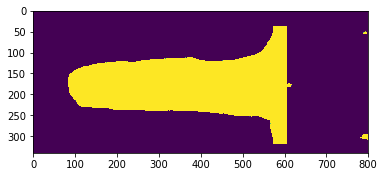

In [66]:
plt.imshow(X_test_unet_cut[0])

In [69]:
X_test_unet_cut.shape

(240, 340, 800)

In [70]:
X_test_cut.shape

(240, 340, 800, 1)

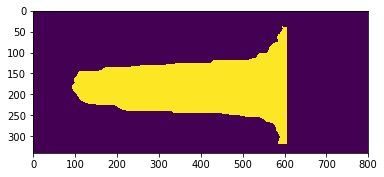

In [71]:
plt.imshow(X_test_cut[1][...,0])

In [76]:
rf.predict([X_test_unet_RF[1].astype(np.uint8)])

array([2.])

In [63]:
y_test

array([10, 25,  4,  2,  4, 10,  2,  2, 10, 25,  2,  4,  2,  2, 25, 25, 25,
       25, 10, 10,  4,  4,  4, 25, 25,  4,  2, 10, 10, 25, 10, 10, 10, 10,
        4, 10, 10, 10,  2, 25,  2,  4,  4, 25,  4,  4,  4, 10,  4,  4,  2,
        2,  4, 10,  2, 25, 25,  2, 10, 10,  2, 25,  4,  4,  4,  4,  4, 10,
        2, 25, 10,  2,  4,  4,  2, 25, 10,  4,  2,  2, 25, 25,  2,  2,  4,
       10, 10,  2,  2, 10,  4,  4,  2, 25,  4,  4,  4,  2,  2,  2,  4,  2,
       10,  2,  2, 25,  2,  4,  2,  2, 10, 10, 10,  4, 25,  2,  4,  2, 10,
        4, 10,  2, 25,  4, 25, 25, 25, 10, 25,  2, 10,  2,  4,  4, 25, 25,
        4,  2, 10, 10, 25, 10,  4,  4, 10, 10, 10, 25,  4,  4, 10,  2,  4,
       25, 25,  2, 25,  2, 10,  2, 10, 25,  2,  4,  4, 10, 10,  4,  4,  4,
       10,  2,  4,  2, 10, 10,  2, 10, 25,  2,  2, 25, 10, 25, 25, 25,  4,
       25,  4, 25,  4, 25,  2,  4, 25,  2,  4, 25, 25, 25,  2, 25, 10,  2,
       10,  4, 10,  2, 10,  2, 25, 10,  4, 25,  2, 25, 25, 25, 25,  4, 10,
       10, 10, 10, 25,  4

In [74]:
X_test_cut[1][...,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [80]:
X_test_cut[1][...,0][X_test_cut[1][...,0]!=0]

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [81]:
X_test_unet_cut[0][X_test_unet_cut[0]!=0]

array([2.6934828e-34, 4.4616344e-35, 1.4082635e-38, ..., 2.8038732e-23,
       2.0302219e-30, 4.3684898e-25], dtype=float32)

In [82]:
X_test_unet_cut_uint8 = X_test_unet_cut.astype(np.uint8)

In [86]:
X_test_unet_cut_uint8[0] = X_test_unet_cut_uint8[0]*255

In [90]:
rf.predict([X_test_unet_cut_uint8[0].ravel()])

array([25.])

In [91]:
X_test_unet_cut = X_test_unet_cut.astype(np.uint8)*255

In [92]:
X_test_unet_RF = reshape_RF(X_test_unet_cut)

In [93]:
preds_unet = rf.predict(X_test_unet_RF)

In [94]:
preds_unet

array([25.        , 10.        ,  2.        ,  4.2       ,  2.        ,
       25.        ,  4.4       , 25.        ,  4.2       , 10.        ,
       10.5       ,  2.        ,  2.        , 10.        ,  2.        ,
        2.        ,  4.        , 10.        , 10.        ,  4.4       ,
        4.6       , 10.5       , 10.5       ,  4.4       ,  2.        ,
        2.        , 10.5       ,  4.        ,  4.        ,  4.4       ,
        4.        , 10.5       , 10.        , 10.5       ,  4.        ,
        4.        ,  4.        ,  2.        ,  4.6       , 10.        ,
       25.        ,  2.        , 25.        ,  4.8       , 25.        ,
        4.        ,  4.        ,  2.        ,  2.        ,  2.        ,
       10.        , 25.        ,  4.        ,  2.        , 25.        ,
        4.        , 25.        , 25.        , 25.        ,  4.        ,
        4.        ,  2.        ,  2.        ,  2.        ,  2.        ,
       25.        ,  2.        ,  4.        ,  4.4       ,  4.  

In [95]:
mean_squared_error(preds_unet, y_test_pred_unet)

0.04672685185185186